In [149]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from wordcloud import WordCloud, STOPWORDS

### 다음 기사 크롤링

In [18]:
# 1. url 가져오기
url = 'https://news.v.daum.net/v/20210209190014945'

# 2. 해당 url에 요청 보내고 응답 받아오기
res = req.get(url)

# 3. BeautifulSoup으로 html형식으로 파싱하여 가져옴
html = bs(res.text,'html.parser')

# 4. 태그들로 지정된 곧 데이터 가져오기
# 4-1. 제목
Title = html.select_one('.tit_view').text

# 4-2. 내용(p태그의 경우 여러개 있어서 반복문으로 꺼냈음)
content = html.select('section > p')
news = ''
for txt in content:
    news += txt.text

# 5. 최종 출력
print(f'제목 : {Title}')
print(news)

제목 : 코로나로 세수 2년째 감소..주식·부동산 덕에 '펑크'는 겨우 면해
코로나19 확산 영향으로 지난해 세수가 2019년보다 8조원 가까이 줄었다. 기업활동 위축으로 법인세가 큰 폭으로 감소한 영향이다.다만 우려했던 ‘세수 펑크’는 피할 수 있었다. 정부가 지난해 추가경정예산(추경)을 편성하는 과정에서 미리 세수 목표치를 10조원 이상 줄여 놓은 데다, 부동산·주식 거래 활성화로 양도소득세와 증권거래세가 급증한 덕이다.정부가 9일 마감한 2020 회계연도 총세입·총세출 결과를 보면 지난해 총세입은 465조5,000억원, 총세출은 453조8,000억원으로 각각 집계됐다. 세입에서 세출을 뺀 잉여금은 11조7,000억원인데 이 중 올해 예산으로 이월되는 2조3,000억원을 제외한 9조4,000억원이 흑자로 남았다. 2015년 이후 6년 연속 흑자다.지난해 국세수입은 2019년(293조4,500억원)보다 7조9,000억원 줄어든 285조5,5000억원에 그쳤다. 2019년 세수가 전년 대비 1,200억원 가량 줄어든 데 이어 2년 연속 감소세다.앞서 세수가 감소한 것은 1998년과 2009년, 2013년, 2019년 등 총 네 차례였다. 2년 연속 세수가 줄어든 것은 이번이 처음이다. 세수 감소율(-2.7%)로만 따져도 외환위기 당시인 1998년(-3.0%)에 이어 두 번째로 큰 폭이다.작년 세수는 정부의 목표치(279조7,000억원) 보다는 5조8,000억원(2.1%) 더 걷히며 체면치레는 했다. 다만 이는 정부가 추경을 거치면서 당초 292조원이던 목표치를 큰 폭으로 줄였기 때문이다. 부동산, 주식시장 활성화 영향으로 이와 관련한 세금이 예상보다 10조원 이상 더 걷힌 영향도 있다.코로나로 기업 활동이 위축되면서 법인세가 당초 목표한 것보다 2조9,600억원(지난해 대비 16조6,600억원) 덜 걷힌 55조5,100억원에 그쳤다. 교통에너지환경세(-1조5,000억원), 종합소득세(-8,800억원), 관세(-6,600억원) 등도 줄었다.이 가운데 세수를 떠받

### 네이버 영화 현재 상영작

In [32]:
url = 'https://movie.naver.com/movie/running/current.nhn'
res = req.get(url)
html = bs(res.text,'html.parser')

# 영화 제목 가져와서 리스트에 넣기
title = html.select('.tit > a')
title_nowing = []
for txt in title:
    title_nowing.append(txt.text)

# 평점 가져오기
scores = html.select('a > .num')
star = []
for score in scores:
    star.append(score.text)

print(len(title_nowing), len(star))

114 114


In [38]:
# 가져와서 DataFrame으로 출력
data = {
    "movie" : title_nowing,
    "star" : star
}

df = pd.DataFrame(data)
idx = []

for i in range(1,len(title_nowing)+1):
    idx.append(i)
    
# 인덱스 설정 (원래는0 부터인데 1부터 되도록)
df.index = idx

df.head()

,movie,star
1,소울,9.35
2,극장판 귀멸의 칼날: 무한열차편,9.21
3,어니스트 씨프,8.12
4,해피 투게더,9.18
5,세자매,8.31


### 영화 리뷰 가져오기

In [28]:
import re

In [123]:
url_main = 'https://movie.naver.com/'
src = 'movie/bi/mi/pointWriteFormList.nhn?code=196051&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false&page=1'
url = url_main + src
res = req.get(url)
html = bs(res.text, 'html.parser')

# 리뷰 잘 긁어오는지 확인
reviews = []
for i in range(1,11):
    review = str(html.select(f'#_filtered_ment_{i}'))
    review = re.sub("<.+?>|\r|\t|\n",'',review).strip('[]')
    if review:
        reviews.append(review)

In [125]:
# 페이지 수 계산 (총 리뷰 개수)
total = int(html.select_one('strong.total > em').text.replace(',',''))
print(total)
# 한페이지에 10개니까 총 448페이지
pageNum = total // 10

if total % 10 > 0:
    pageNum += 1

print(pageNum)

4503
451


위에 두개를 합쳐서

In [180]:
# url 가져오기
movie = '196051'
url_main = 'https://movie.naver.com/'
src = f'movie/bi/mi/pointWriteFormList.nhn?code={movie}&type=after&isActualPointWriteExecute=false&isMileageSubscriptionAlready=false&isMileageSubscriptionReject=false'
url = url_main + src

# review들을 다 담을 빈 리스트
reviews = []

# 페이지를 하나씩 넘겨가며 리뷰들 긁어오기
for pageNo in range(1,pageNum):
    
    pages = url + '&page=' + str(pageNo)
    res = req.get(pages)
    html = bs(res.text,'html.parser')
    
    for i in range(1,11):
        review = str(html.select(f'#_filtered_ment_{i}'))
        review = re.sub("<.+?>|\r|\t|\n",'',review).strip('[]')
        if review:
            reviews.append(review)

In [181]:
len(reviews)

3681

### 가져온 리뷰들 워드 클라우드로 만들기

In [182]:
# 파일에 다 넣기
f = open('data/귀멸.txt','w')
for text in reviews:
    f.write(text+'\n')
f.close()

In [183]:
text = open('data/귀멸.txt','r').read()

In [184]:
wc = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf', background_color = "white", max_words=2000)
wc = wc.generate(text)

(-0.5, 399.5, 199.5, -0.5)

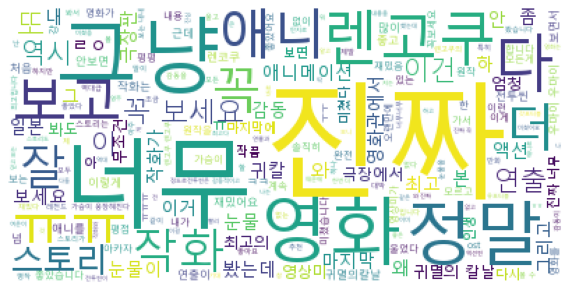

In [185]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis('off')